# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_total = len(mouse_study_complete.groupby("Mouse ID").count())
mice_total

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'])]
#print(duplicate_mice, sep='\n')

# Drop duplicated mouse from dataframe
duplicate_mice_id = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_study_complete.loc[mouse_study_complete["Mouse ID"] == "g989"]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_study_complete.loc[mouse_study_complete["Mouse ID"]!="g989"]
cleaned_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_total = len(cleaned_mouse_data.groupby("Mouse ID").count())
cleaned_mice_total

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean of the tumor volume & rename column
tumor_mean = cleaned_mouse_data.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"].rename("Mean Tumor Volume")

# median of the tumor volume & rename column
tumor_median = cleaned_mouse_data.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"].rename("Median Tumor Volume")

# variance of the tumor volume & rename column
tumor_variance = cleaned_mouse_data.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"].rename("Tumor Volume Variance")

# standard deviation of the tumor volume & rename column
tumor_std = cleaned_mouse_data.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"].rename("Tumor Volume Standard Deviation")

# SEM of the tumor volume & rename column
tumor_sem = cleaned_mouse_data.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"].rename("Tumor Volume SEM")

# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({
    "Mean Tumor Volume" : tumor_mean,
    "Median Tumor Volume" : tumor_median,
    "Tumor Volume Variance" : tumor_variance,
    "Tumor Volume Standard Deviation" : tumor_std,
    "Tumor Volume SEM" : tumor_sem
})

tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary = cleaned_mouse_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
adv_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# what will appear on the bar graph
bar_data = cleaned_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
sort_drugs = bar_data.sort_values(ascending=False)
sort_drugs

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

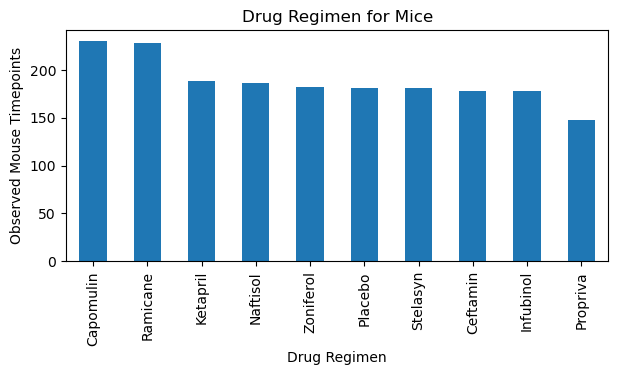

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
sort_drugs.plot(kind="bar", figsize=(7,3))

#set chart title
plt.title("Drug Regimen for Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Observed Mouse Timepoints")

#show chart and set layout
plt.show()

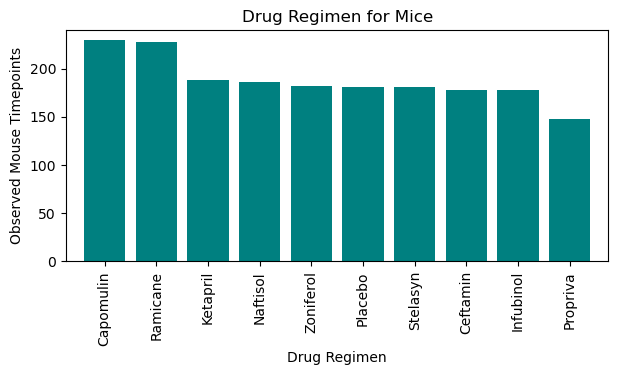

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(sort_drugs))
tick_locations = [value for value in x_axis]

# Defining data to be generated
plt.figure(figsize=(7,3))
plt.bar(x_axis, sort_drugs, color="teal", alpha=1, align="center")
plt.xticks(tick_locations, sort_drugs.index.values, rotation="vertical")

# Setting x and y limit
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sort_drugs)+10)

plt.title("Drug Regimen for Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Observed Mouse Timepoints")

plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# seperate male and female mice for pie chart
male_female = cleaned_mouse_data.groupby(["Sex"]).count()["Mouse ID"]
print(male_female)

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64


Text(0.5, 1.0, 'Distribution of Mice by Gender')

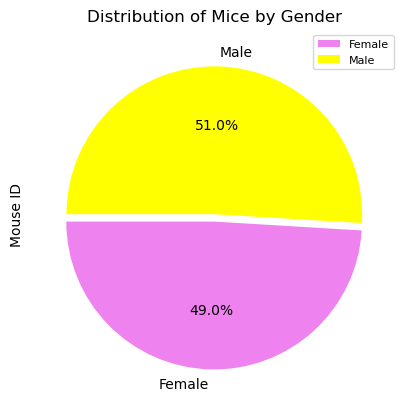

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["violet", "yellow"]
explode = (0.05, 0)

panda_pie_plot = male_female.plot.pie(y="Total Count", colors=colors, explode=explode, startangle=180, autopct="%1.1f%%")
panda_pie_plot.legend(["Female", "Male"], prop={'size': 8})
plt.title("Distribution of Mice by Gender")


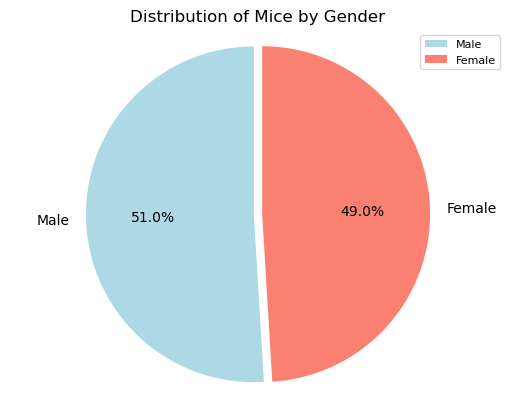

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue", "salmon"]
explode = (0.05, 0)
py_pie_plot = cleaned_mouse_data["Sex"].value_counts()

plt.pie(py_pie_plot.values, labels=py_pie_plot.index, colors=colors, explode=explode, startangle=90, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Mice by Gender")
plt.legend(["Male", "Female"], prop={'size': 8})
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Create empty list to fill with tumor vol data (for plotting)
by_mouse = cleaned_mouse_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(cleaned_mouse_data,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
capo = get_outliers("Capomulin")
rami = get_outliers("Ramicane")
infu = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = cleaned_mouse_data[cleaned_mouse_data["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1
 

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

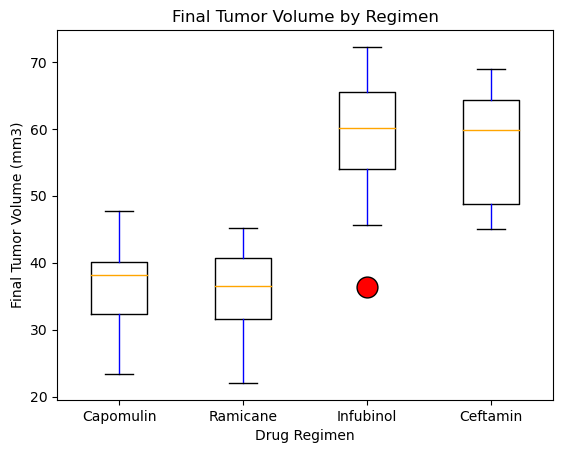

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Set axis and title
fig1, group_box = plt.subplots()
group_box.set_title("Final Tumor Volume by Regimen")
group_box.set_ylabel("Final Tumor Volume (mm3)")
group_box.set_xlabel("Drug Regimen")

# Box plot colours
boxprops = {"color" : "black", "linewidth": 1}
whiskerprops = {"color" : "blue", "linewidth": 1}
medianprops = {"color" : "orange", "linewidth": 1}
flierprops = {"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": "15"}

# Create box plot
group_box.boxplot([capo, rami, infu, ceft], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], 
                  boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops, flierprops=flierprops)
plt.savefig("boxplot")
plt.show()


## Line and Scatter Plots

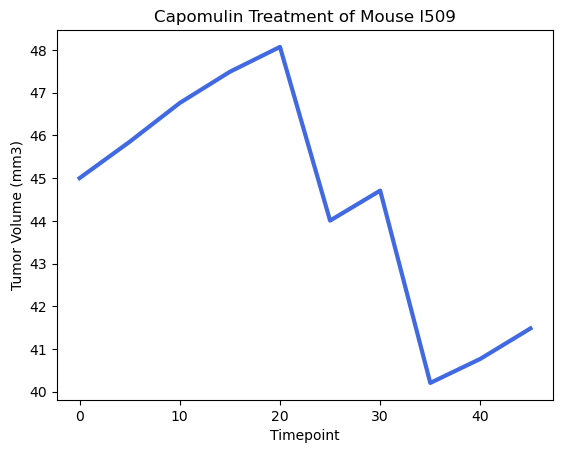

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = cleaned_mouse_data.loc[(cleaned_mouse_data["Mouse ID"] == "l509")]
line_plot = line_plot.set_index("Timepoint")
line_plot

#Final plot
line_plot["Tumor Volume (mm3)"].plot(color = "royalblue", linewidth = "3")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


Text(0.5, 1.0, 'Weight Versus Average Tumor Volume for Capomulin')

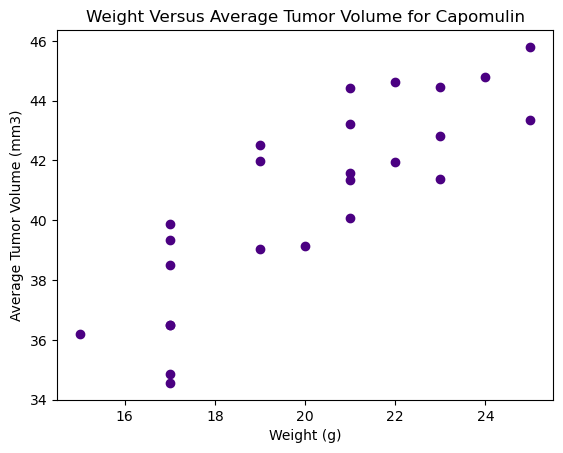

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plot = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"] == "Capomulin")]
scatter_plot

scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean(numeric_only=True)
scatter_plot_df

# set x and y value
weight_scatter_plot = scatter_plot_df["Weight (g)"]
volume_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_scatter_plot, volume_scatter_plot, color = "indigo")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Versus Average Tumor Volume for Capomulin")


## Correlation and Regression

The correlation between the average tumor volume and mouse weight is 0.84


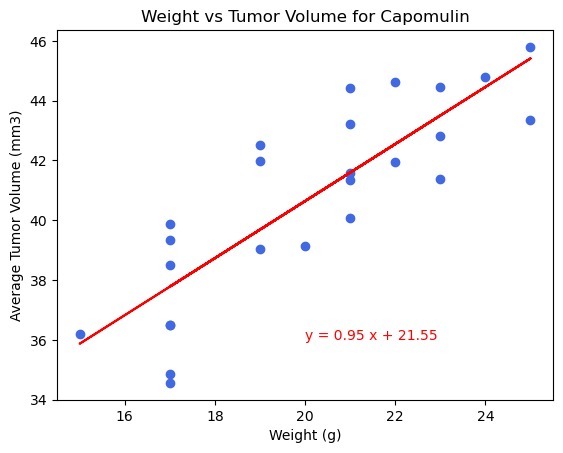

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(scatter_plot_df["Weight (g)"],scatter_plot_df["Tumor Volume (mm3)"])
print(f"The correlation between the average tumor volume and mouse weight is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(scatter_plot_df["Weight (g)"],scatter_plot_df["Tumor Volume (mm3)"])
regress_values=scatter_plot_df["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(line_eq,(20,36), fontsize=10, color='red')

plt.scatter(scatter_plot_df["Weight (g)"],scatter_plot_df["Tumor Volume (mm3)"],color='royalblue')
plt.plot(scatter_plot_df["Weight (g)"], regress_values, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


